<a href="https://colab.research.google.com/github/ajinkya1832/-Image-Classification-using-CNNs-Deep-Learning-/blob/main/Image_Classification_using_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow numpy matplotlib


In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np


In [6]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Class names in CIFAR-10
class_names = ['car', 'mobile', 'train', 'lion', 'tiger', 'Dog', 'fan', 'van', 'Ship', 'bike']

In [8]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_test, y_test))


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.4547 - loss: 1.4913 - val_accuracy: 0.5821 - val_loss: 1.1887
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.6036 - loss: 1.1124 - val_accuracy: 0.6263 - val_loss: 1.0541
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.6672 - loss: 0.9477 - val_accuracy: 0.6607 - val_loss: 0.9706
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.7033 - loss: 0.8540 - val_accuracy: 0.6762 - val_loss: 0.9261
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.7301 - loss: 0.7696 - val_accuracy: 0.6832 - val_loss: 0.9266


In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest Accuracy: {test_acc * 100:.2f}%')


313/313 - 4s - 12ms/step - accuracy: 0.1301 - loss: 2.3043

Test Accuracy: 13.01%


In [10]:
# Load VGG16 without the top classification layer
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze all layers of VGG16
vgg_base.trainable = False

# Adding custom layers
fine_tuned_model = models.Sequential([
    vgg_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

fine_tuned_model.compile(optimizer=Adam(learning_rate=0.0001),
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

fine_tuned_model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [16]:
history_ft = fine_tuned_model.fit(x_train, y_train, epochs=5,
                                  validation_data=(x_test, y_test))


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 639s 408ms/step - accuracy: 0.3616 - loss: 1.8737 - val_accuracy: 0.5063 - val_loss: 1.4276
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 718s 431ms/step - accuracy: 0.5284 - loss: 1.3811 - val_accuracy: 0.5423 - val_loss: 1.3239
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 639s 404ms/step - accuracy: 0.5633 - loss: 1.2839 - val_accuracy: 0.5600 - val_loss: 1.2739
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 682s 404ms/step - accuracy: 0.5770 - loss: 1.2348 - val_accuracy: 0.5690 - val_loss: 1.2441
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 668s 428ms/step - accuracy: 0.5856 - loss: 1.2009 - val_accuracy: 0.5729 - val_loss: 1.2256


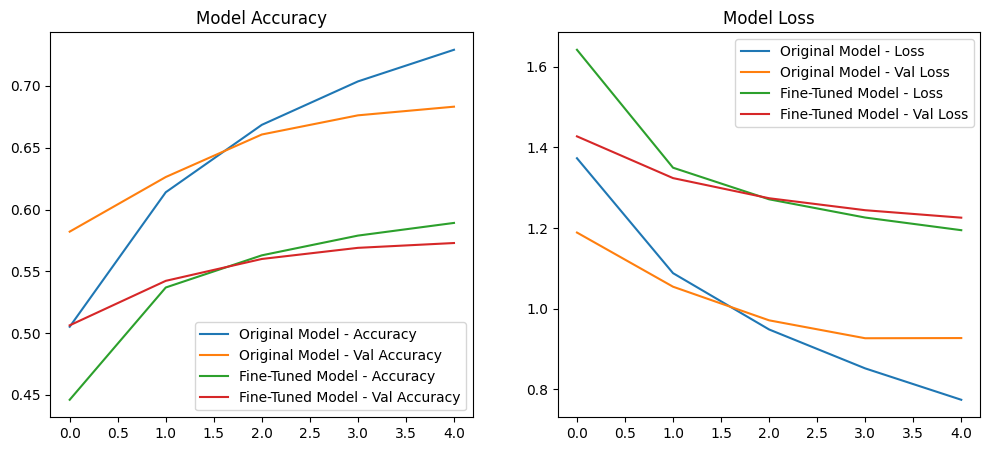

In [19]:
plt.figure(figsize=(12, 5))

# Plotting Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Original Model - Accuracy')
plt.plot(history.history['val_accuracy'], label='Original Model - Val Accuracy')
plt.plot(history_ft.history['accuracy'], label='Fine-Tuned Model - Accuracy')
plt.plot(history_ft.history['val_accuracy'], label='Fine-Tuned Model - Val Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Original Model - Loss')
plt.plot(history.history['val_loss'], label='Original Model - Val Loss')
plt.plot(history_ft.history['loss'], label='Fine-Tuned Model - Loss')
plt.plot(history_ft.history['val_loss'], label='Fine-Tuned Model - Val Loss')
plt.legend()
plt.title('Model Loss')

plt.show()
